In [7]:
import pandas as pd
import numpy as np
#import the necessary module
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


df_results = pd.read_csv('results.csv')
df_results.head()

,method,masked,grey,red,green,blue,SRM,EBC,brightness
0,random sampling,True,81,157,56,9,17,33,47
1,pca + random sampling,True,79,155,54,7,17,33,46
2,most dominant,True,80,153,52,4,18,35,47
3,pca + most dominant,True,79,155,54,7,17,33,46
4,raw,False,79,155,53,7,17,33,46


In [8]:
# Normalize
# to eliminate diffrent range effect 
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

In [9]:
df_results.columns

Index(['method', 'masked', 'grey', 'red', 'green', 'blue', 'SRM', 'EBC',
       'brightness'],
      dtype='object')

In [10]:
methods = list(set(df_results.method))
methods

['raw',
 'pca + random sampling',
 'pca + most dominant',
 'random sampling',
 'most dominant']

In [11]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)


clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method raw
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method pca + random sampling
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method pca + most dominant
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method random sampling
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method most dominant


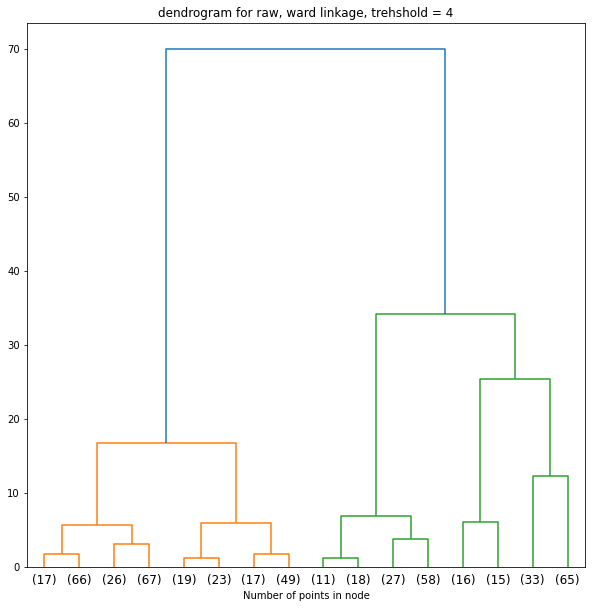

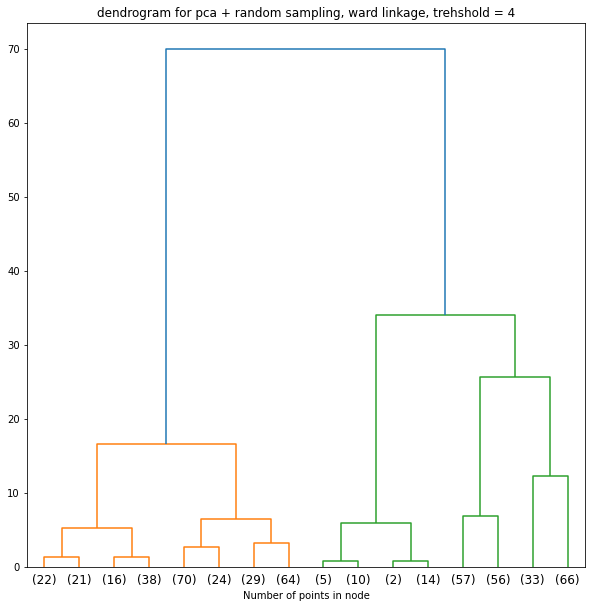

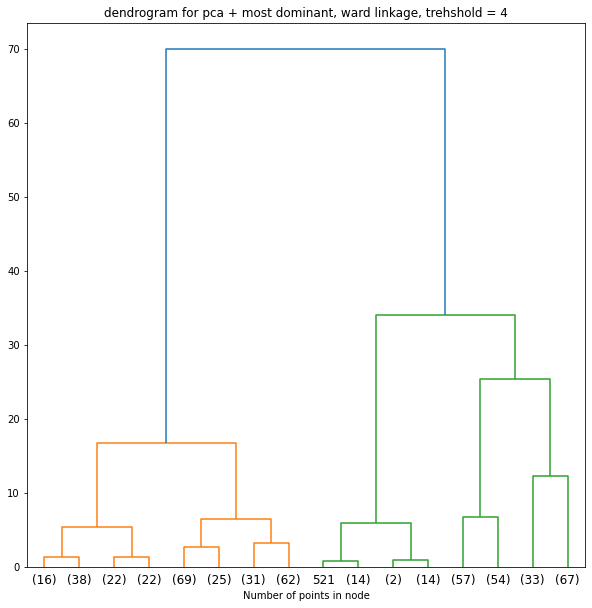

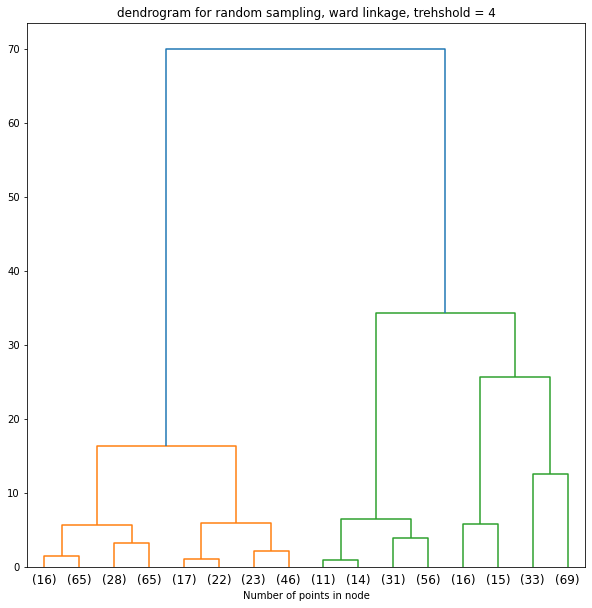

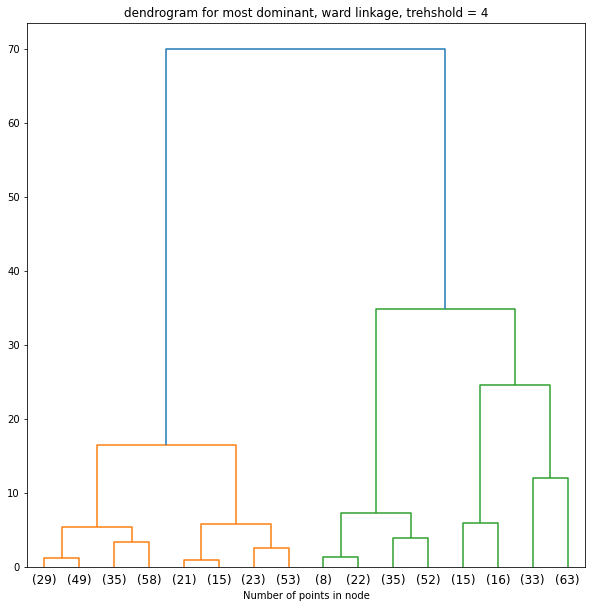

In [13]:
def prepare_x(df, method):
    df_result_method = df[df['method']==method]
    columns_X = ['grey', 'red', 'green', 'blue', 'SRM','EBC', 'brightness']
    X = np.array(df_result_method[columns_X ])
    X = normalize(X)
    return X

#https://towardsdatascience.com/a-practical-introduction-to-hierarchical-clustering-from-scikit-learn-ffaf8ee2670c

for method in methods:
    x = prepare_x(df_results, method)
    #create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
    #set the number of clusters to none so that we can plot the dendrogram afterwards
    model = AgglomerativeClustering(linkage="ward", 
                                    distance_threshold = 4, 
                                    n_clusters=None)
    #fit the model to the data
    model.fit(x)
    
    #get label information
    df_result_method = df_results[df_results['method']==method].copy()
    df_result_method['agg_label'] = model.labels_
    df_to_store = df_result_method[[ 'agg_label']]
    df_to_store.to_csv(f'{method}_hac.csv', index = False)
    print(f'clusters found  {set(df_result_method.agg_label)} for method {method}')
    
    #plot it
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_title("Hierarchical clustering dendrogram")
    #plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.title(f'dendrogram for {method}, ward linkage, trehshold = 4')
    ax.set_xlabel("Number of points in node")
    plt.savefig(f'{method}_dendrogram.png')

    



In [7]:
"""
clusters found  {0, 1, 2, 3, 4, 5} for method pca + most dominant
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8} for method raw
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method most dominant
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8} for method pca + random sampling
clusters found  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} for method random sampling
"""

"""
PCA + most dominant does not differentiate
other method do differentiate 8 or 9 clusters.  
"""


'\nPCA + most dominant does not differentiate\nother method do differentiate 8 or 9 clusters. \n'